<a href="https://colab.research.google.com/github/shksherry/SPECjvm2008/blob/master/IoT%20Big%20Data%20Analytics%20Dataset%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



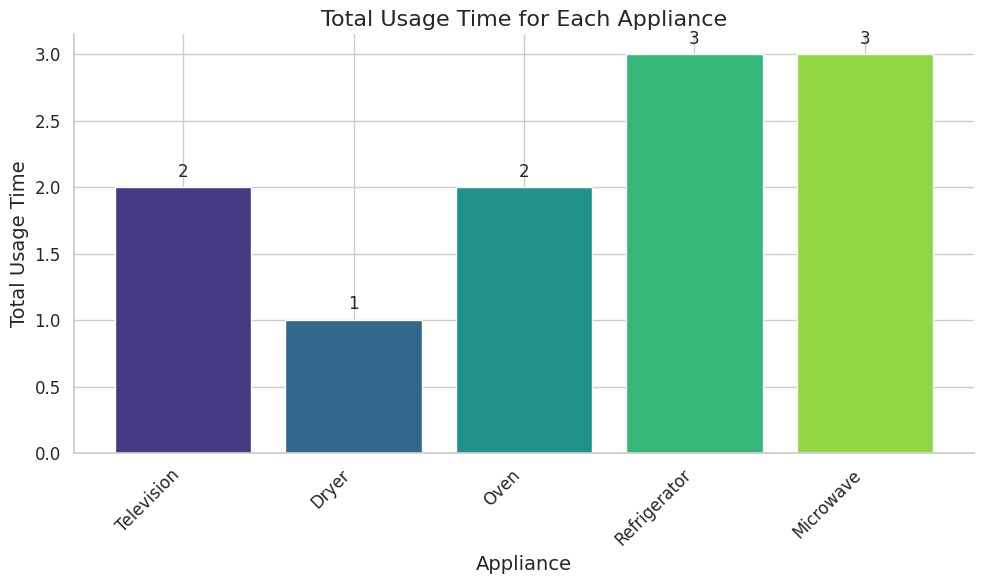

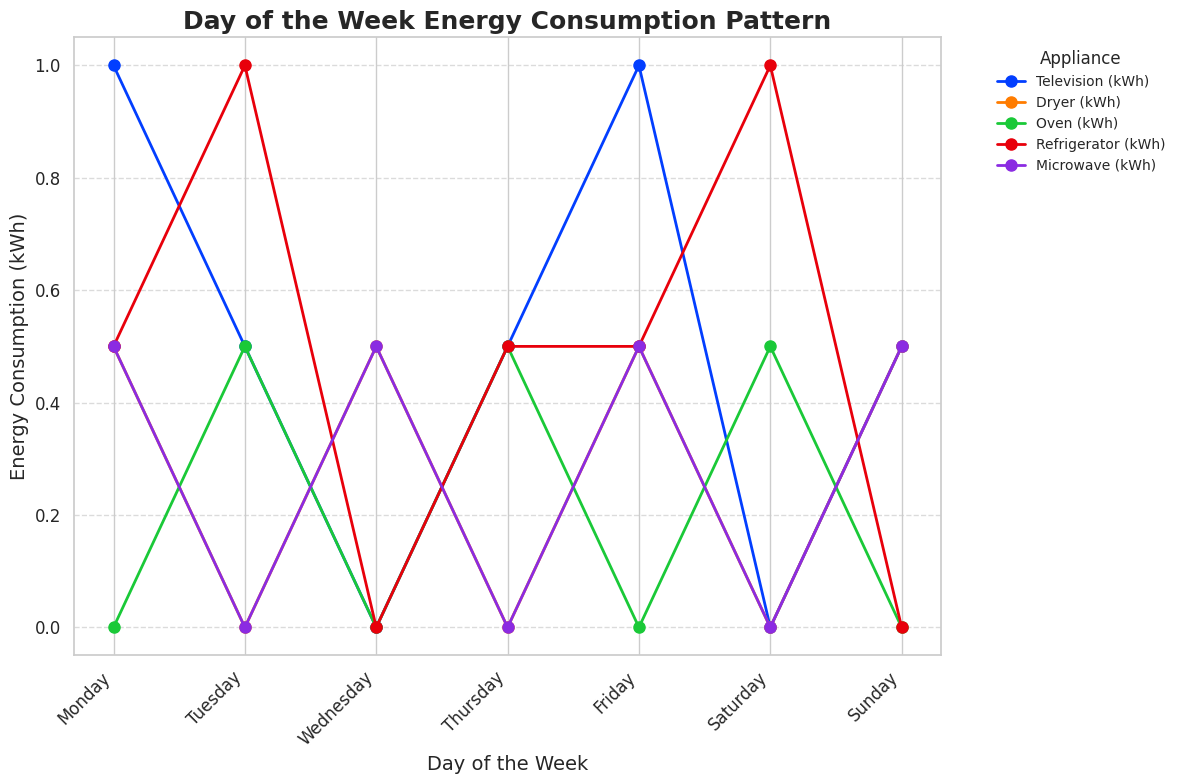

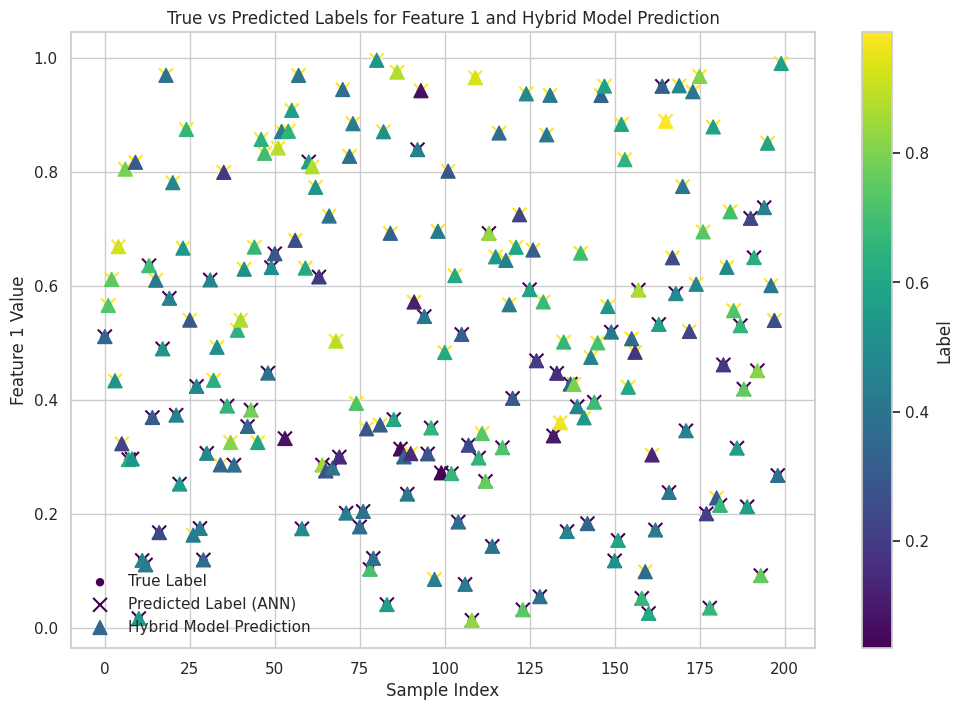

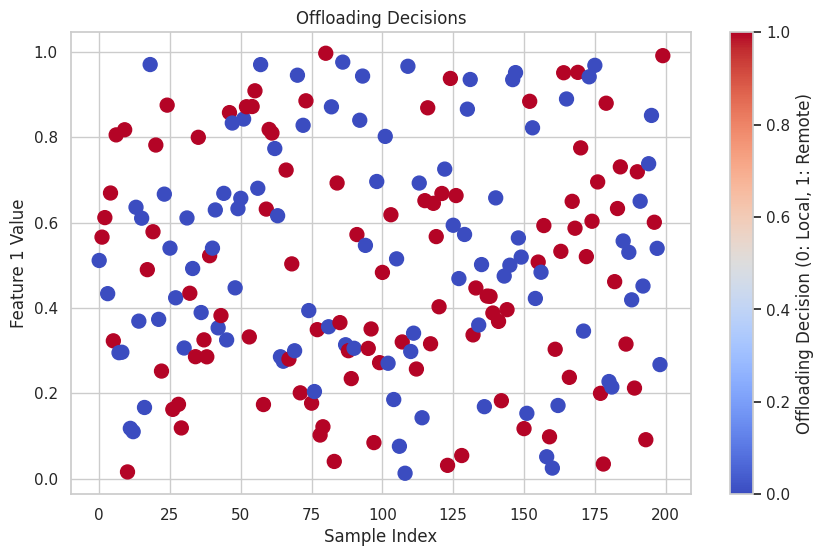

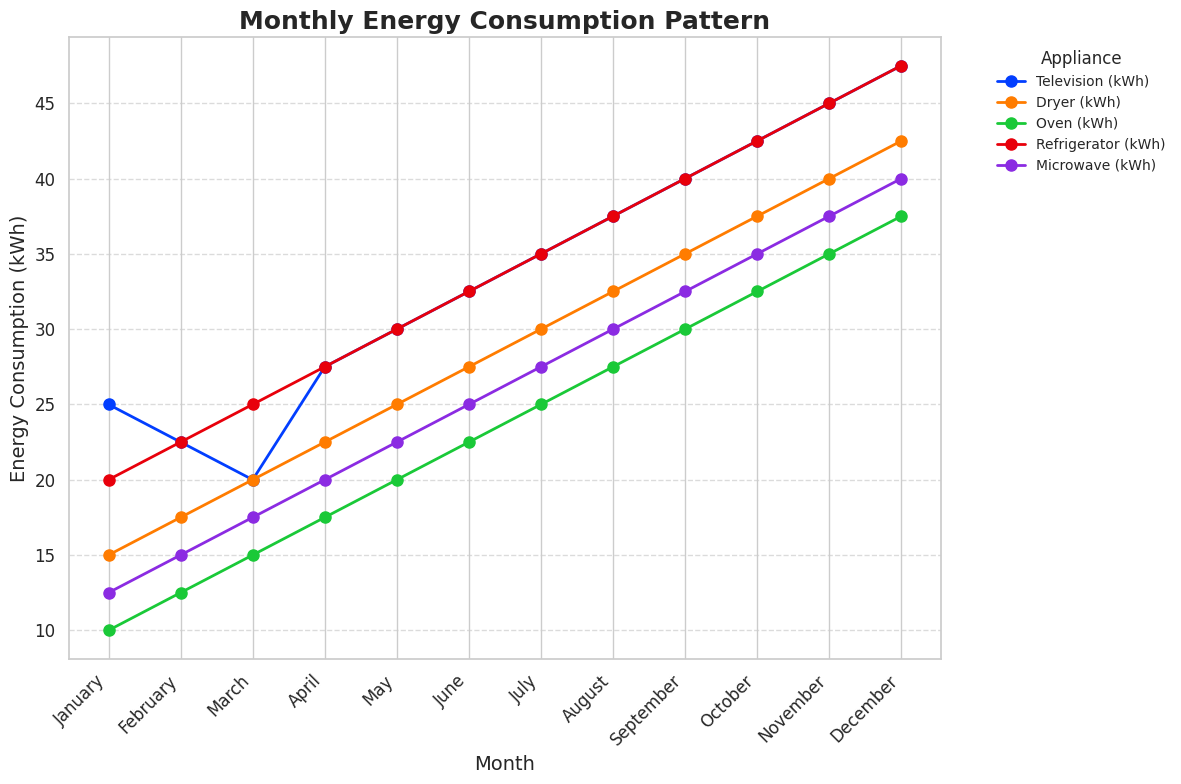

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



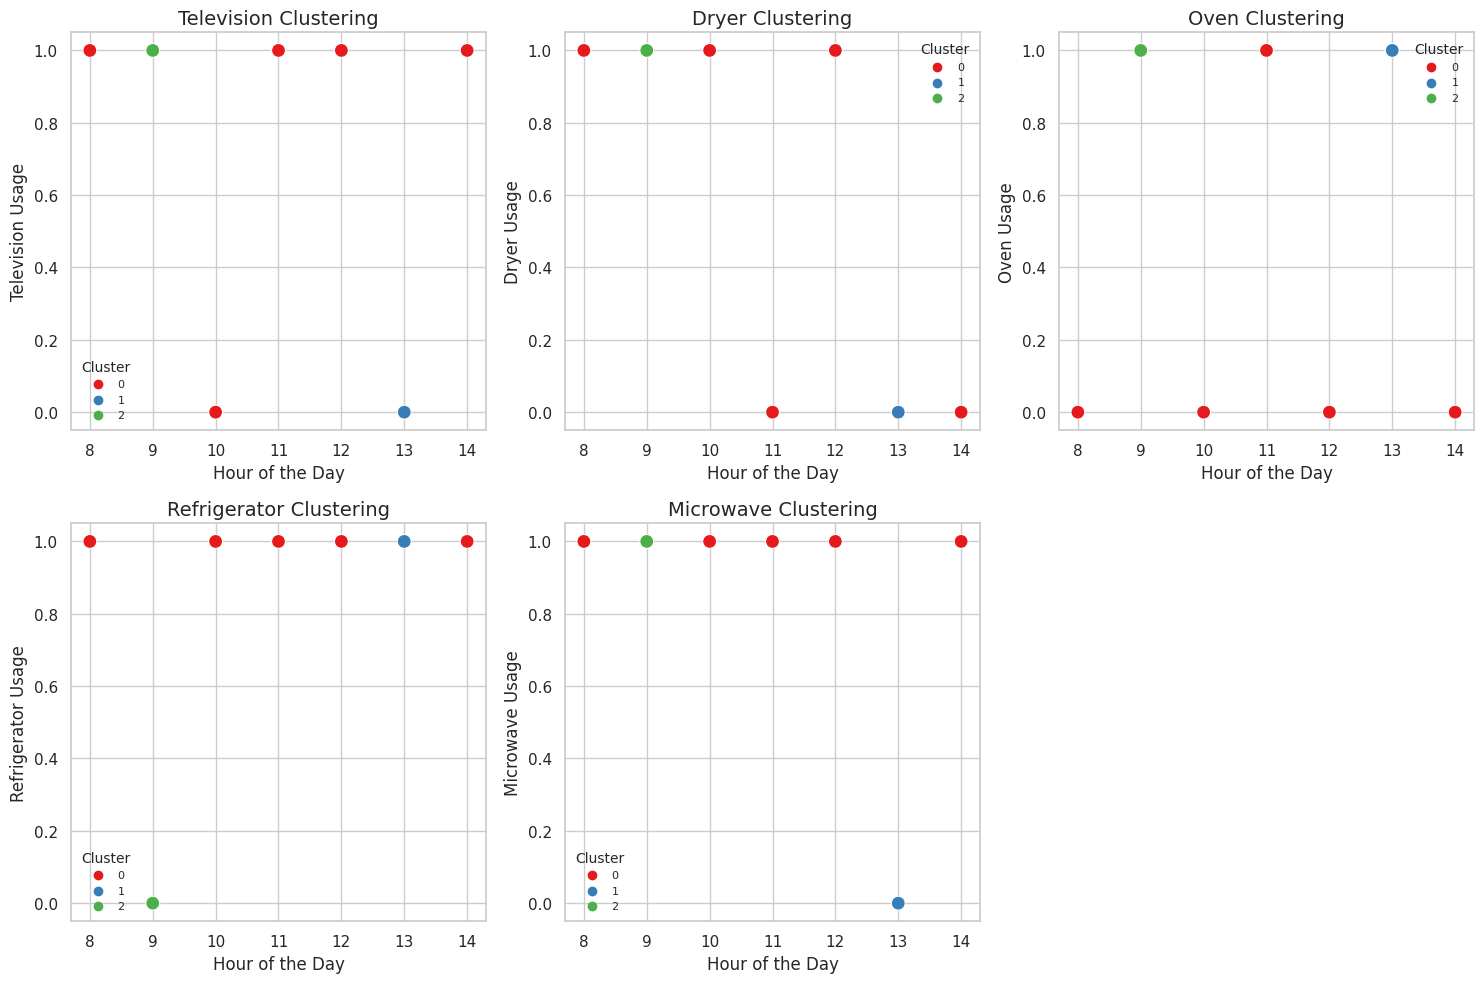

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Timestamp': ['8 am--9 am', '9 am--10 am', '10 am--11 am', '11 am--12 pm'],
    'Television': [0, 1, 1, 0],
    'Dryer': [0, 1, 0, 0],
    'Oven': [1, 0, 0, 1],
    'Refrigerator': [1, 0, 1, 1],
    'Microwave': [0, 1, 1, 1]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'appliance_usage_data.csv'
df.to_csv(csv_filename, index=False)

# Load the CSV file into a DataFrame
loaded_df = pd.read_csv(csv_filename)

# Example: Calculate the total usage time for each appliance
total_usage_time = loaded_df.iloc[:, 1:].sum()

# Set a seaborn style
sns.set(style="whitegrid")

# Create a color palette
colors = sns.color_palette("viridis", len(total_usage_time))

# Plot a bar chart with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(total_usage_time.index, total_usage_time.values, color=colors)

# Add data labels
for bar, value in zip(bars, total_usage_time):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             str(value), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Total Usage Time for Each Appliance', fontsize=16)
plt.xlabel('Appliance', fontsize=14)
plt.ylabel('Total Usage Time', fontsize=14)

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Day of the Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Television': [2, 1, 0, 1, 2, 0, 1],
    'Dryer': [1, 0, 1, 0, 1, 0, 1],
    'Oven': [0, 1, 0, 1, 0, 1, 0],
    'Refrigerator': [1, 2, 0, 1, 1, 2, 0],
    'Microwave': [1, 0, 1, 0, 1, 0, 1]
}

df_weekly_energy_pattern = pd.DataFrame(data)

# Define energy unit (e.g., kilowatt-hours)
energy_unit = 'kWh'

# Convert energy values to kilowatt-hours
df_weekly_energy_pattern.iloc[:, 1:] *= 0.5  # Assuming a conversion factor

# Plot the Day of the Week Energy Consumption Pattern
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a brighter color palette
colors = sns.color_palette("bright", n_colors=len(df_weekly_energy_pattern.columns) - 1)

# Plot a line chart for each appliance
for i, appliance in enumerate(df_weekly_energy_pattern.columns[1:]):
    plt.plot(df_weekly_energy_pattern['Day of the Week'], df_weekly_energy_pattern[appliance],
             label=f'{appliance} ({energy_unit})', marker='o', color=colors[i], linewidth=2, markersize=8)

# Add labels and title
plt.title('Day of the Week Energy Consumption Pattern', fontsize=18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel(f'Energy Consumption ({energy_unit})', fontsize=14)

# Show legend
plt.legend(title='Appliance', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 5

# Generate features (x)
X = np.random.rand(n_samples, n_features)

# Generate labels (y) based on a simple condition
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run ANN model (Naive Bayes classifier)
model = GaussianNB()
model.fit(X_train, y_train)

# Calculate mean and standard deviation
mean_by_class = {}
std_by_class = {}
for c in np.unique(y_train):
    mean_by_class[c] = np.mean(X_train[y_train == c], axis=0)
    std_by_class[c] = np.std(X_train[y_train == c], axis=0)

# Calculate prior probability
prior_prob = {c: np.sum(y_train == c) / len(y_train) for c in np.unique(y_train)}

# Get observation sequence
observation_sequence = X_test

# Predict parameters
theta_hat = model.predict(X_test)

# Create a hybrid model (Assuming ARIMA and LSTM predictions are available)
w1, w2 = 0.5, 0.5  # Adjust weights as needed
y_hat_arima = np.random.rand(len(X_test))  # Placeholder for ARIMA predictions
y_hat_lstm = np.random.rand(len(X_test))  # Placeholder for LSTM predictions
y_hat_hybrid = w1 * y_hat_arima + w2 * y_hat_lstm

# Final Offloading Decision
P_local = np.random.rand(len(X_test))  # Placeholder for actual computation
P_remote = np.random.rand(len(X_test))  # Placeholder for actual computation
offloading_decision = np.where(P_local > P_remote, "Remote", "Local")

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature 1': X_test[:, 0],
    'Feature 2': X_test[:, 1],
    'True Label': y_test,
    'Predicted Label (ANN)': theta_hat,
    'Hybrid Model Prediction': y_hat_hybrid,
    'Offloading Decision': offloading_decision
})

# Visualize the results
# Plot the true labels, predicted labels (ANN), and hybrid model predictions
plt.figure(figsize=(12, 8))
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['True Label'], cmap='viridis', label='True Label', marker='o', edgecolors='w', s=50)
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Predicted Label (ANN)'], cmap='viridis', marker='x', s=100, label='Predicted Label (ANN)')
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Hybrid Model Prediction'], cmap='viridis', marker='^', s=100, label='Hybrid Model Prediction')
plt.colorbar(label='Label')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 Value')
plt.title('True vs Predicted Labels for Feature 1 and Hybrid Model Prediction')
plt.legend()
plt.show()

# Plot the Offloading Decisions
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Feature 1'], c=results_df['Offloading Decision'].map({'Local': 0, 'Remote': 1}), cmap='coolwarm', marker='o', s=100)
plt.colorbar(label='Offloading Decision (0: Local, 1: Remote)')
plt.xlabel('Sample Index')
plt.ylabel('Feature 1 Value')
plt.title('Offloading Decisions')
plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Television': [50, 45, 40, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Dryer': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85],
    'Oven': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    'Refrigerator': [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    'Microwave': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
}

df_monthly_energy_pattern = pd.DataFrame(data)

# Define energy unit (e.g., kilowatt-hours)
energy_unit = 'kWh'

# Convert energy values to kilowatt-hours
df_monthly_energy_pattern.iloc[:, 1:] *= 0.5  # Assuming a conversion factor

# Plot the Monthly Energy Consumption Pattern
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a brighter color palette
colors = sns.color_palette("bright", n_colors=len(df_monthly_energy_pattern.columns) - 1)

# Plot a line chart for each appliance
for i, appliance in enumerate(df_monthly_energy_pattern.columns[1:]):
    plt.plot(df_monthly_energy_pattern['Month'], df_monthly_energy_pattern[appliance],
             label=f'{appliance} ({energy_unit})', marker='o', color=colors[i], linewidth=2, markersize=8)

# Add labels and title
plt.title('Monthly Energy Consumption Pattern', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel(f'Energy Consumption ({energy_unit})', fontsize=14)

# Show legend
plt.legend(title='Appliance', title_fontsize='12', fontsize='10', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the given data
data = {
    'Hour of the Day': [8, 9, 10, 11, 12, 13, 14],
    'Day of the Week': ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    'Television': [1, 1, 0, 1, 1, 0, 1],
    'Dryer': [1, 1, 1, 0, 1, 0, 0],
    'Oven': [0, 1, 0, 1, 0, 1, 0],
    'Refrigerator': [1, 0, 1, 1, 1, 1, 1],
    'Microwave': [1, 1, 1, 1, 1, 0, 1]
}

df_appliance_patterns = pd.DataFrame(data)

# Select features for clustering
features = df_appliance_patterns.drop(['Hour of the Day', 'Day of the Week'], axis=1)

# Standardize the data
features_standardized = (features - features.mean()) / features.std()

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_appliance_patterns['Cluster'] = kmeans.fit_predict(features_standardized)

# Set a professional style for the plots
sns.set(style="whitegrid")
palette = sns.color_palette("Set1", n_colors=num_clusters)

# Visualize the clusters for each appliance
plt.figure(figsize=(15, 10))

for i, appliance in enumerate(features.columns):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='Hour of the Day', y=appliance, hue='Cluster', data=df_appliance_patterns, palette=palette, s=100)
    plt.title(f'{appliance} Clustering', fontsize=14)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel(f'{appliance} Usage', fontsize=12)
    plt.legend(title='Cluster', title_fontsize='10', fontsize='8')

plt.tight_layout()
plt.show()

